# fastai course for programmers - week 2

In [1]:
import sys
print(sys.version)

3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:52:34) [Clang 18.1.8 ]


In [2]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

/Users/michalrakoczy/.local/share/mamba/envs/ai_fastai_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


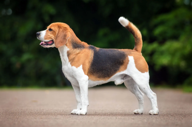

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192, 192))
im

In [4]:
learn = load_learner('model.pkl')

/Users/michalrakoczy/.local/share/mamba/envs/ai_fastai_env/lib/python3.11/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
learn.predict(im)

('False', tensor(0), tensor([9.9996e-01, 4.0442e-05]))

In [10]:
categories = ('Dog', 'Cat')

def classify_image(imgp):
    img = PILImage.create(imgp)
    img.thumbnail((192, 192))
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
classify_image('dog.jpg')

{'Dog': 0.9999595880508423, 'Cat': 4.044230081490241e-05}

In [ ]:
image = gr.Image(type="pil")
label = gr.Label()
examples = ['dog.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)